<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_16_ANN_TurbineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
# Predicting Turbine Energy Yield (TEY) using ambient variables as features.

## 1. Introduction:<a class="anchor" id="1"></a>
### What are neural networks?
+ Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

+ Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

![image.png](attachment:image.png)

In [ ]:
pip install keras-tuner --upgrade

In [ ]:
!pip install scikeras

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from keras.optimizers import Adam
import keras_tuner
from keras_tuner import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [ ]:
# importing Dataset
df = pd.read_csv('/content/gt_full.csv')
df

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,36729,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,36730,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,36731,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,36732,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


## 2. About Dataset<a class="anchor" id="2"></a>

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

|Variable|(Abbrivation)|Unit|Min|Max|Mean|
|:------|:------:|:------|:------|:------|:------|
|Ambient temperature |(AT)| C| 6.23| 37.10| 17.71|
|Ambient pressure |(AP)| mbar |985.85 |1036.56 |1013.07|
|Ambient humidity |(AH)| (%) |24.08 |100.20 |77.87|
|Air filter difference pressure |(AFDP)| mbar |2.09 |7.61 |3.93|
|Gas turbine exhaust pressure |(GTEP)| mbar |17.70 |40.72 |25.56|
|Turbine inlet temperature |(TIT)| C |1000.85 |1100.89 |1081.43|
|Turbine after temperature |(TAT)| C |511.04 |550.61 |546.16|
|Compressor discharge pressure |(CDP)| mbar |9.85 |15.16 |12.06|
|Turbine energy yield |(TEY)| MWH |100.02 |179.50 |133.51|
|Carbon monoxide |(CO)| mg/m3 |0.00 |44.10 |2.37|
|Nitrogen oxides |(NOx)| mg/m3 |25.90 |119.91 |65.29|

## 3. Data Exploration <a class="anchor" id="3"></a>

In [ ]:
# Checking null values
df.isnull().sum()

Unnamed: 0    0
AT            0
AP            0
AH            0
AFDP          0
GTEP          0
TIT           0
TAT           0
TEY           0
CDP           0
CO            0
NOX           0
dtype: int64

In [ ]:
df.shape

(36733, 12)

In [ ]:
df.describe()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,18367.000000,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,10604.048056,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,1.000000,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,9184.000000,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,18367.000000,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,27550.000000,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,36733.000000,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36733 non-null  int64  
 1   AT          36733 non-null  float64
 2   AP          36733 non-null  float64
 3   AH          36733 non-null  float64
 4   AFDP        36733 non-null  float64
 5   GTEP        36733 non-null  float64
 6   TIT         36733 non-null  float64
 7   TAT         36733 non-null  float64
 8   TEY         36733 non-null  float64
 9   CDP         36733 non-null  float64
 10  CO          36733 non-null  float64
 11  NOX         36733 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


In [ ]:
df.nunique()

Unnamed: 0    36733
AT            22523
AP              791
AH            25708
AFDP          20495
GTEP          12967
TIT             799
TAT            2769
TEY            6236
CDP            4447
CO            26185
NOX           23637
dtype: int64

In [ ]:
df[df.duplicated()]

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
# Dropping unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns, df.shape

(Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
        'NOX'],
       dtype='object'),
 (36733, 11))

The features are not on the same scale. For example `AP` has a mean of `1013.19` and `CO` has a mean value of `1.97`. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

In [ ]:
df.corr()['TEY'].sort_values(ascending=False)

TEY     1.000000
CDP     0.988778
GTEP    0.964127
TIT     0.910297
AFDP    0.665483
AP      0.118224
AT     -0.091152
NOX    -0.116127
AH     -0.137360
CO     -0.569813
TAT    -0.682396
Name: TEY, dtype: float64

## 4. Data Visualization<a class="anchor" id="4"></a>

+ ###  Univariate plots<a class="anchor" id="4.1"></a>

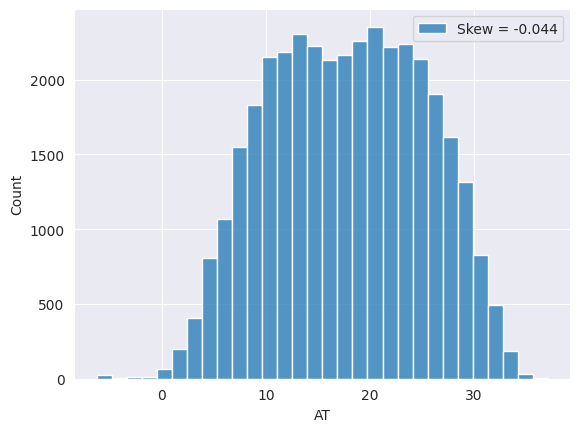

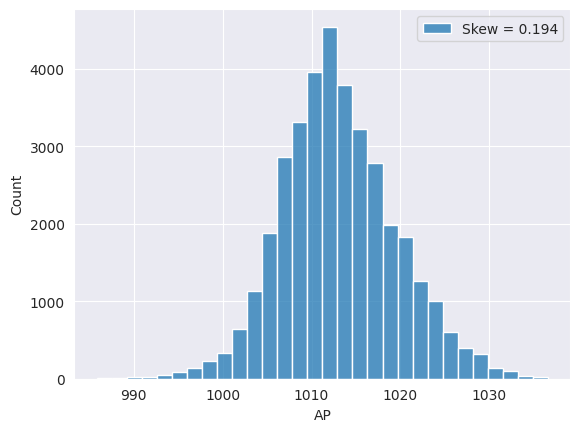

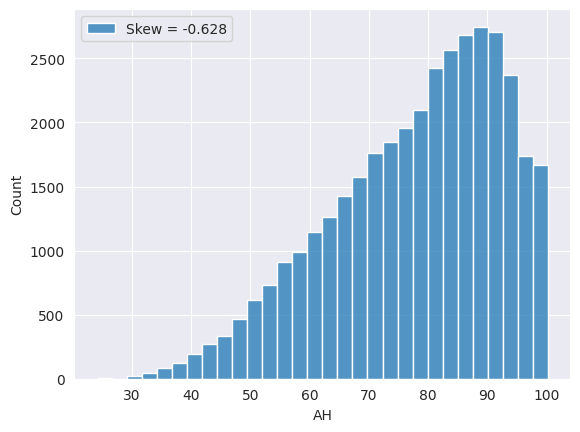

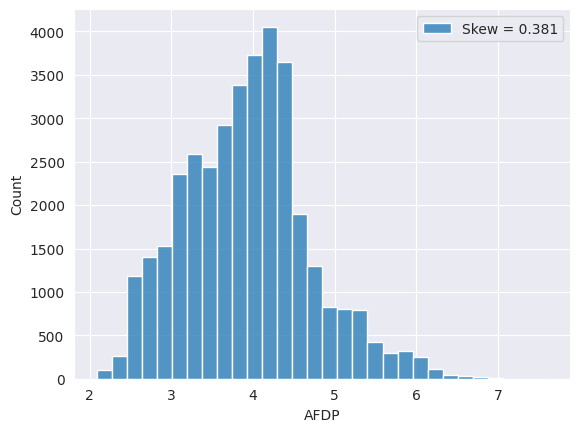

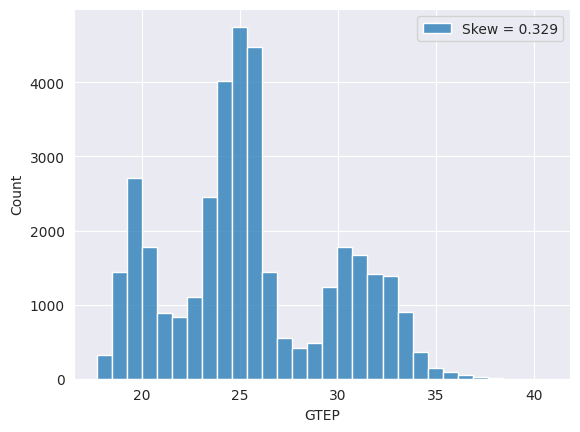

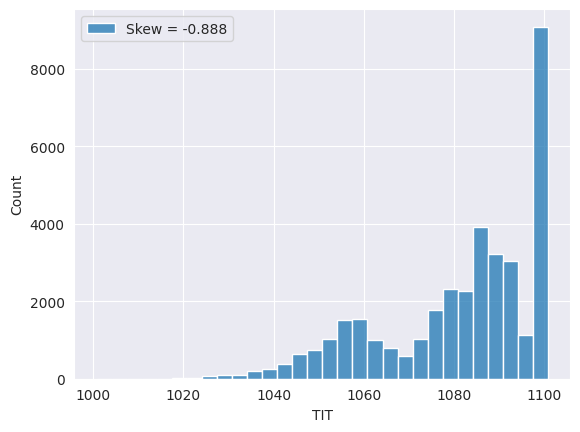

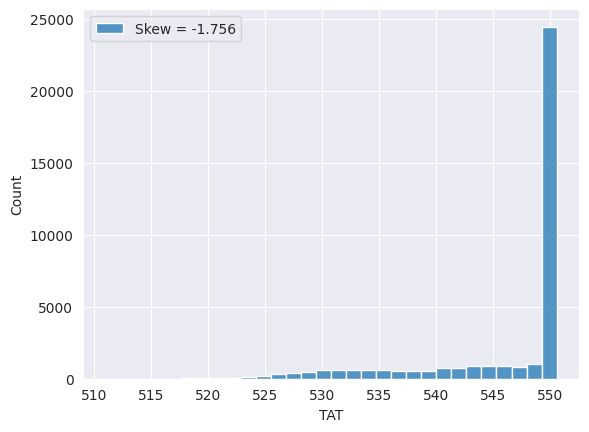

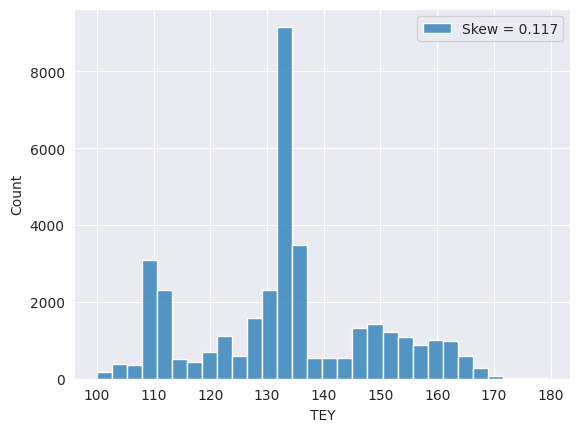

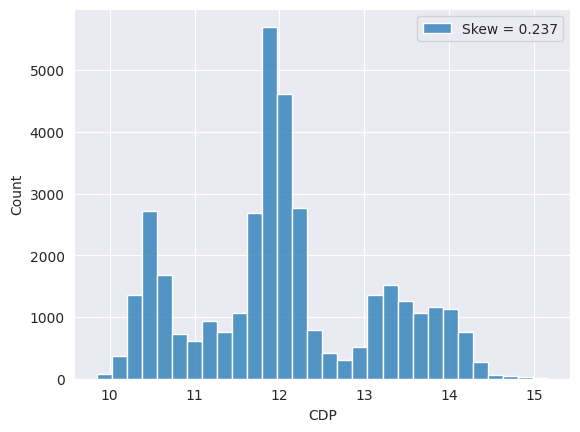

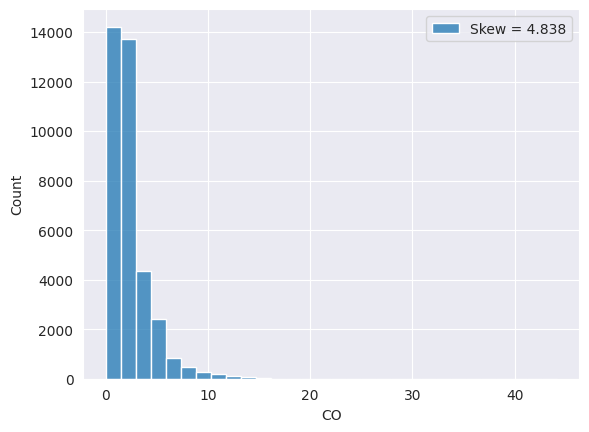

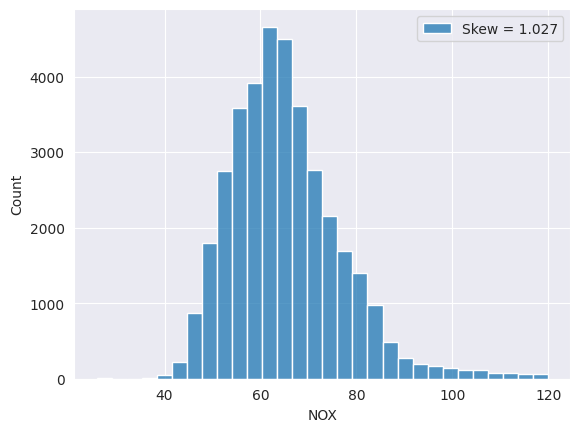

In [ ]:
for feature in df.columns:
  skew = df[feature].skew()
  sns.histplot(df[feature], kde=False, label='Skew = %.3f'%(skew), bins=30)
  plt.legend(loc='best')
  plt.show()

Some of the features are normally distributed. The features AH, CO, TITy and TATa exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature	(TIT) and Turbine after temperature	(TAT) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

# Outliers Detection

In [ ]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


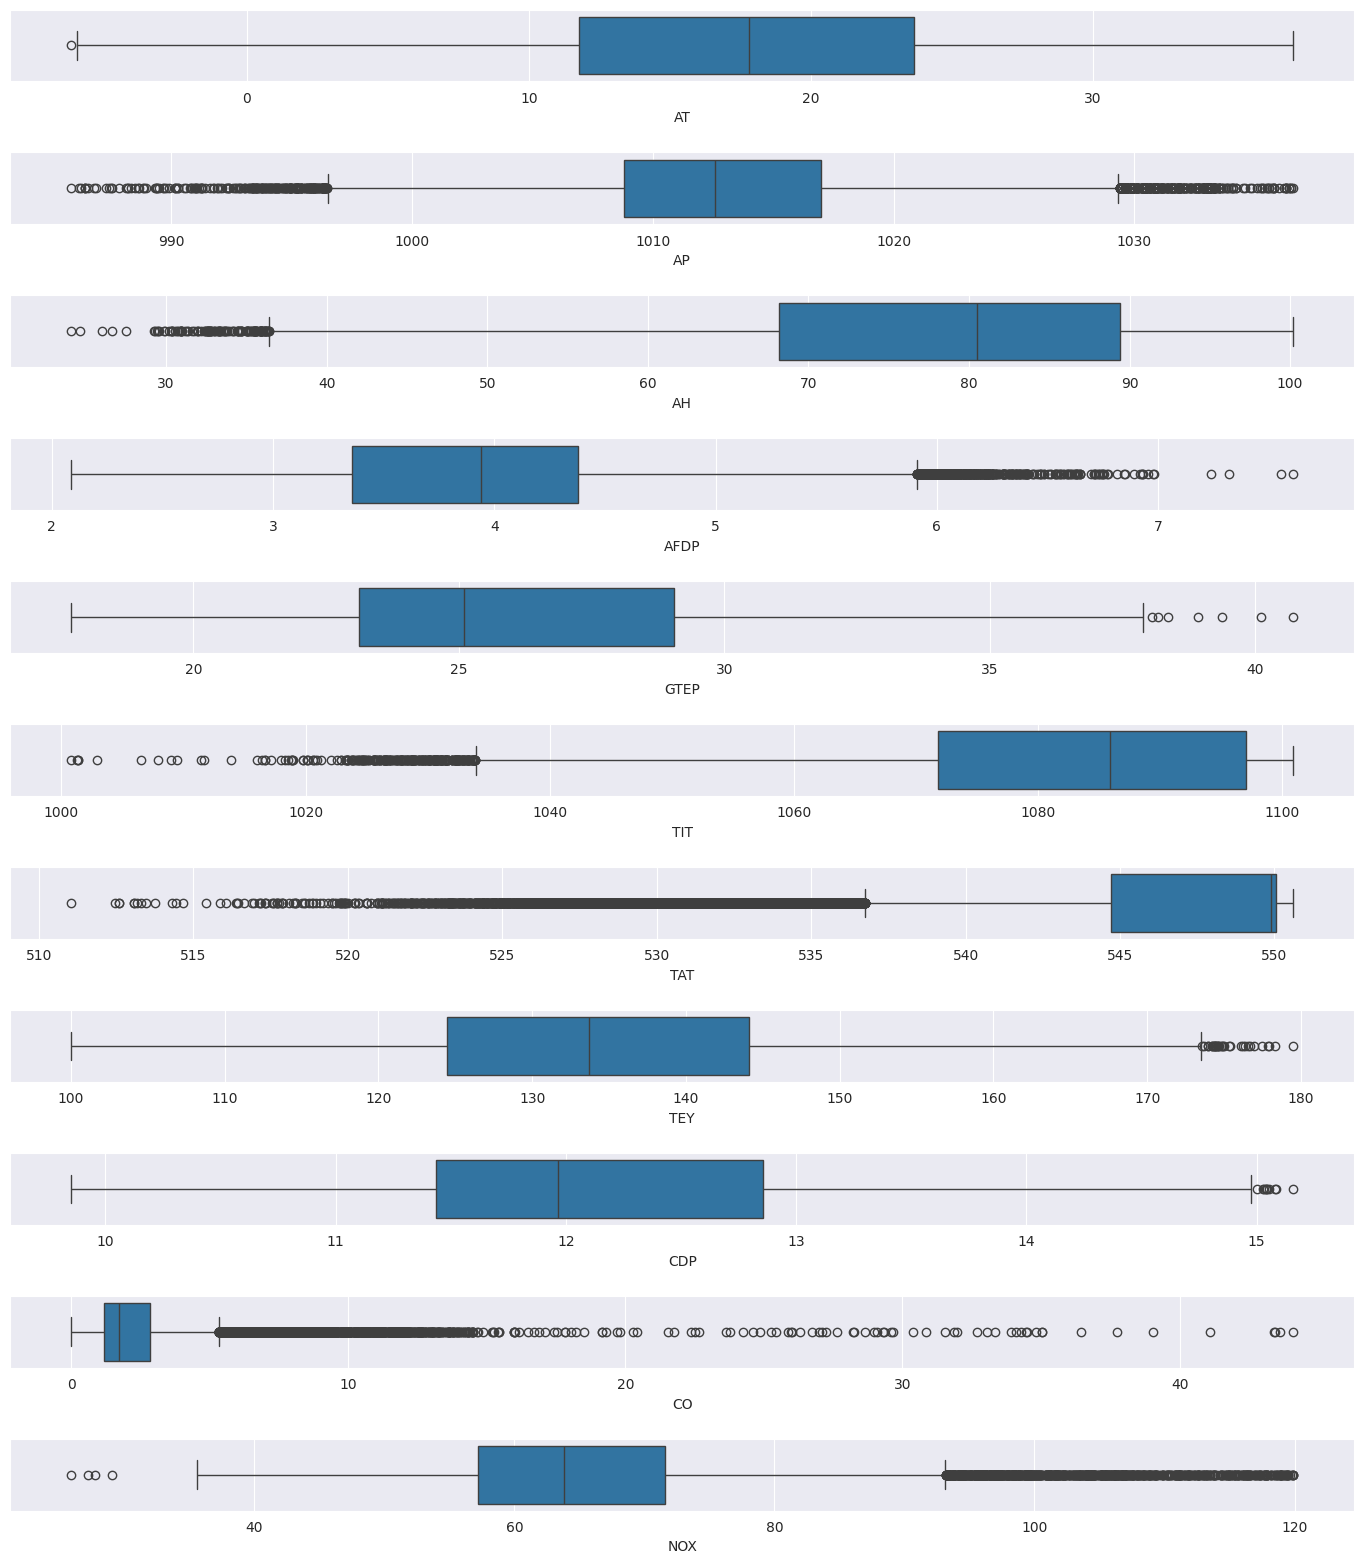

In [ ]:
ot=df.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,ax=axes[0])
sns.boxplot(x='AP',data=ot,ax=axes[1])
sns.boxplot(x='AH',data=ot,ax=axes[2])
sns.boxplot(x='AFDP',data=ot,ax=axes[3])
sns.boxplot(x='GTEP',data=ot,ax=axes[4])
sns.boxplot(x='TIT',data=ot,ax=axes[5])
sns.boxplot(x='TAT',data=ot,ax=axes[6])
sns.boxplot(x='TEY',data=ot,ax=axes[7])
sns.boxplot(x='CDP',data=ot,ax=axes[8])
sns.boxplot(x='CO',data=ot,ax=axes[9])
sns.boxplot(x='NOX',data=ot,ax=axes[10])
plt.tight_layout(pad=2.0)

<Axes: >

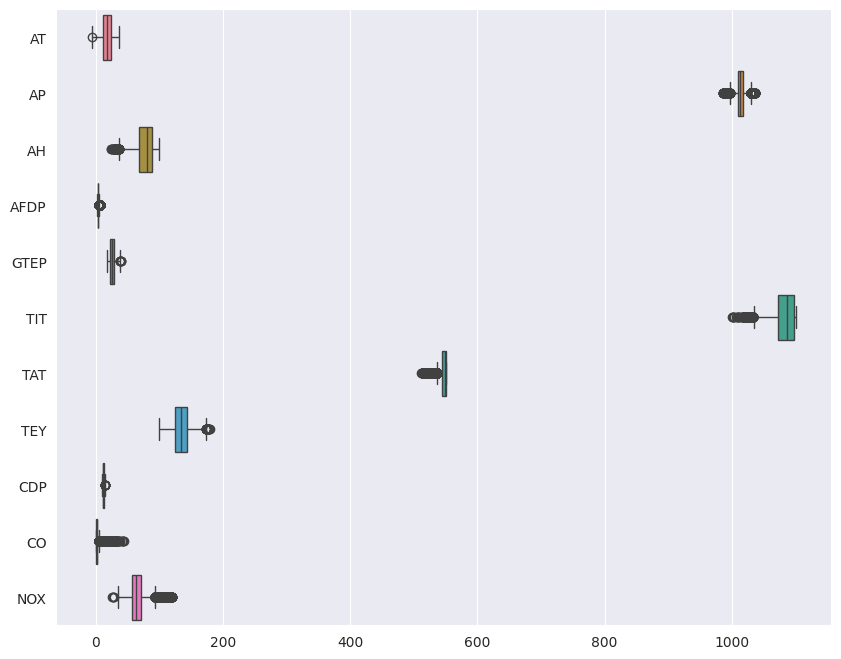

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df,orient='h' )

Text(0.5, 1.0, 'Histogram of the Target column')

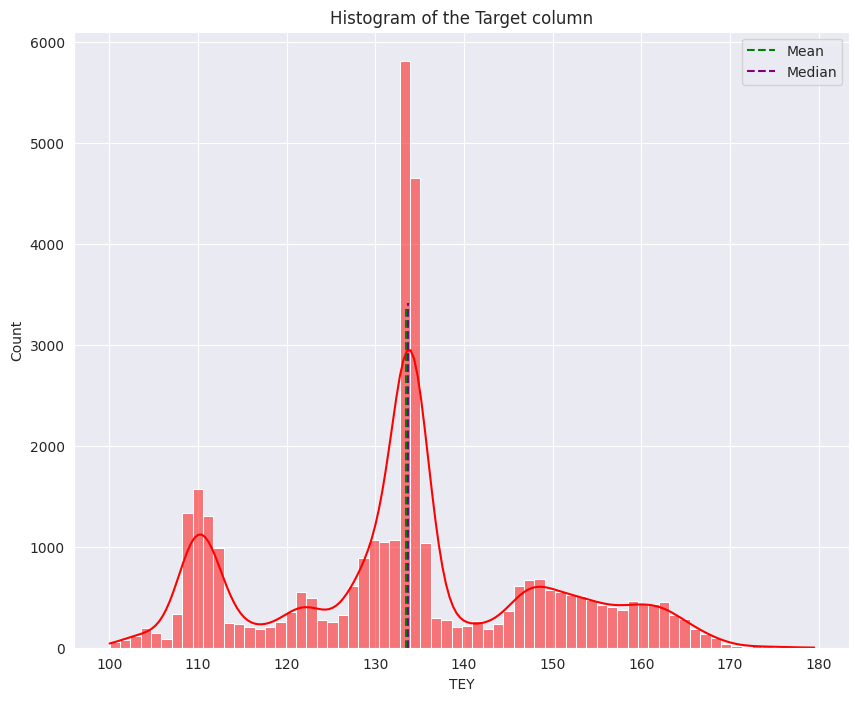

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(data = df, x = 'TEY', color='red', kde = True)
plt.axvline(x = df['TEY'].mean(), ymax = 0.55, color='green',linestyle = '--',label='Mean')
plt.axvline(x = df['TEY'].median(), ymax = 0.56, color='purple',linestyle = '--',label='Median')
plt.legend()
plt.title('Histogram of the Target column')

#### Unsurprisingly, Mostly none of the features are on the same scale as we already saw in the previous section.

+ ### Multivariate Analysis<a class="anchor" id="4.2"></a>


Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


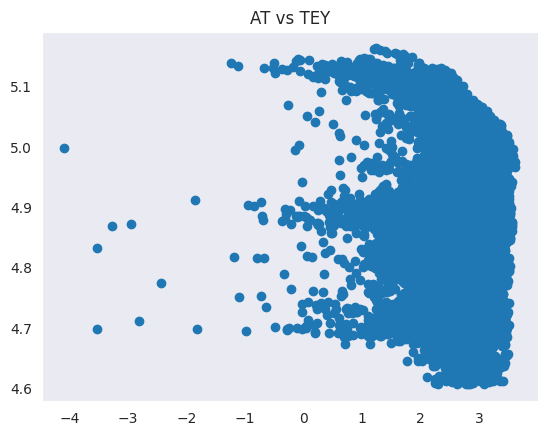

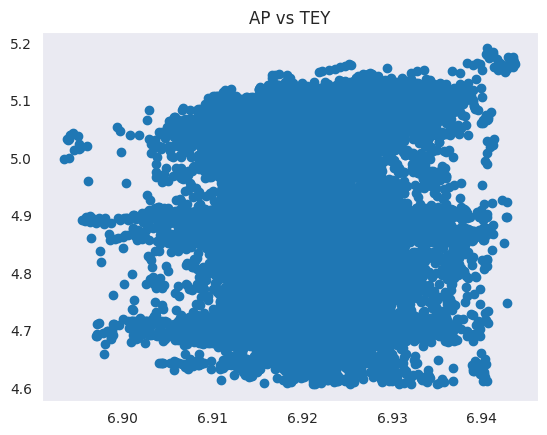

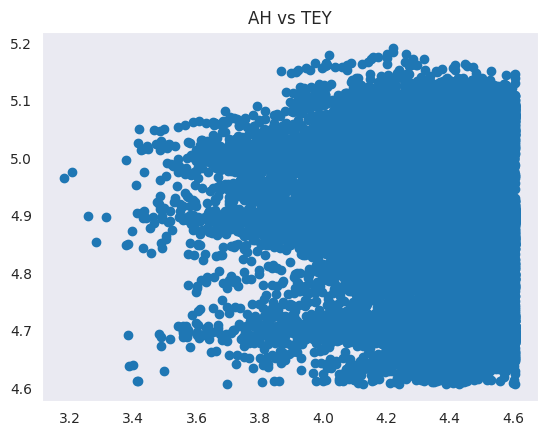

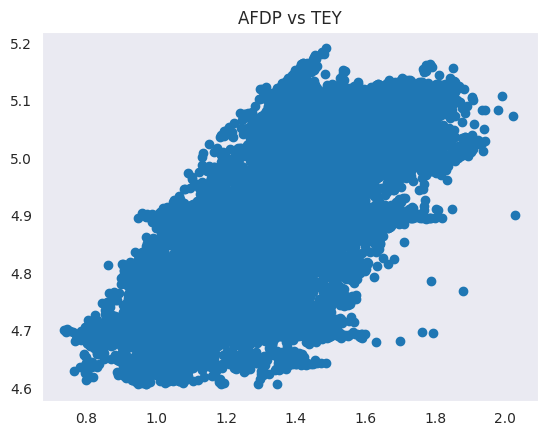

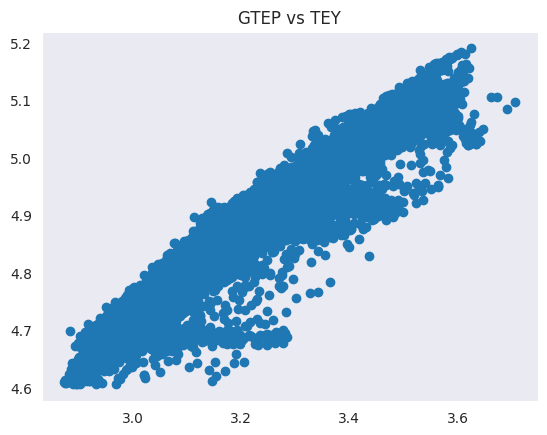

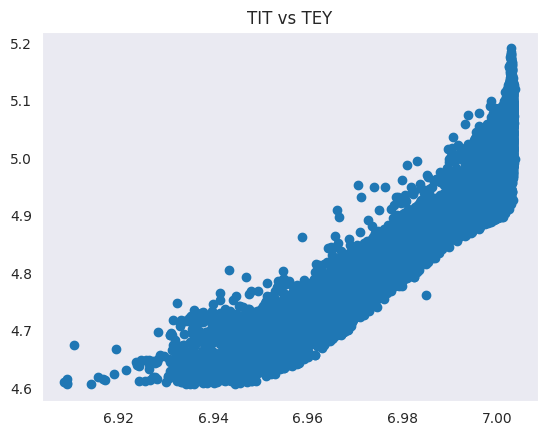

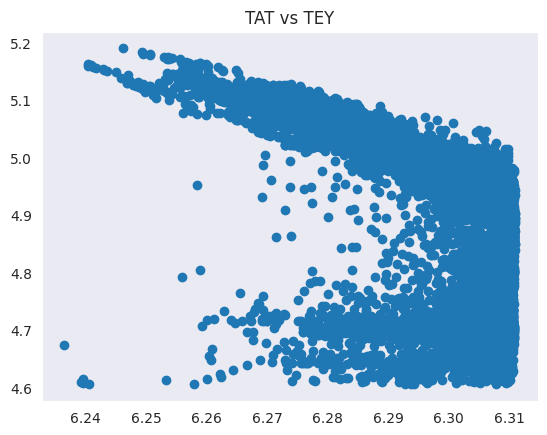

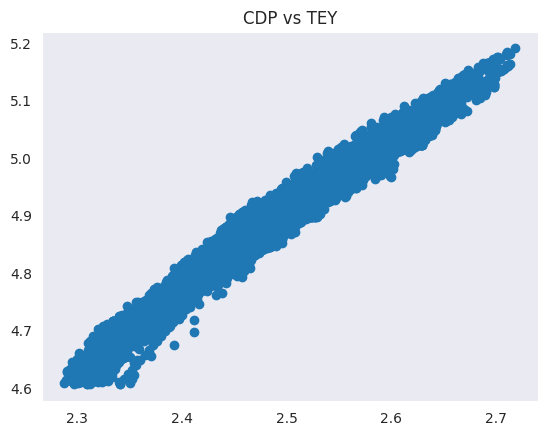

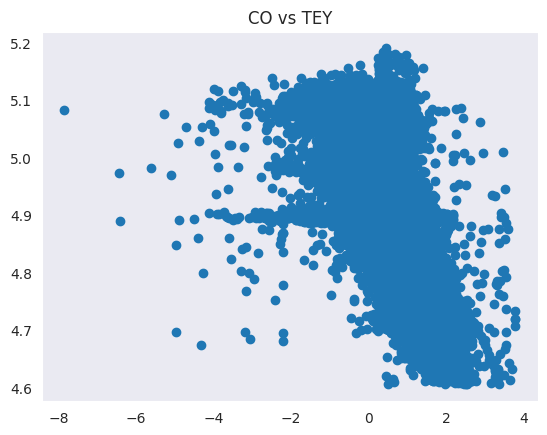

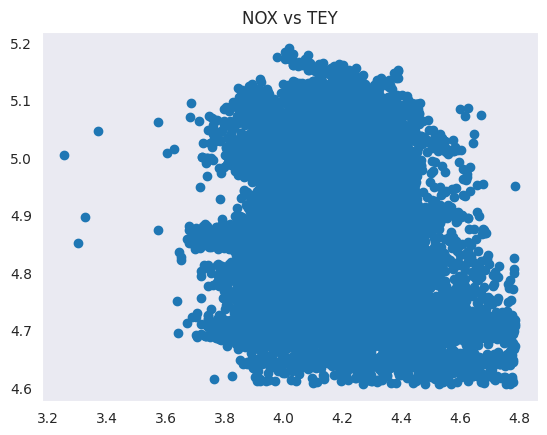

In [ ]:
for i in df.columns:
  if i != 'TEY':
    plt.scatter(np.log(df[i]), np.log(df['TEY']))
    plt.title(i + ' vs TEY')
    plt.grid()
    plt.show()

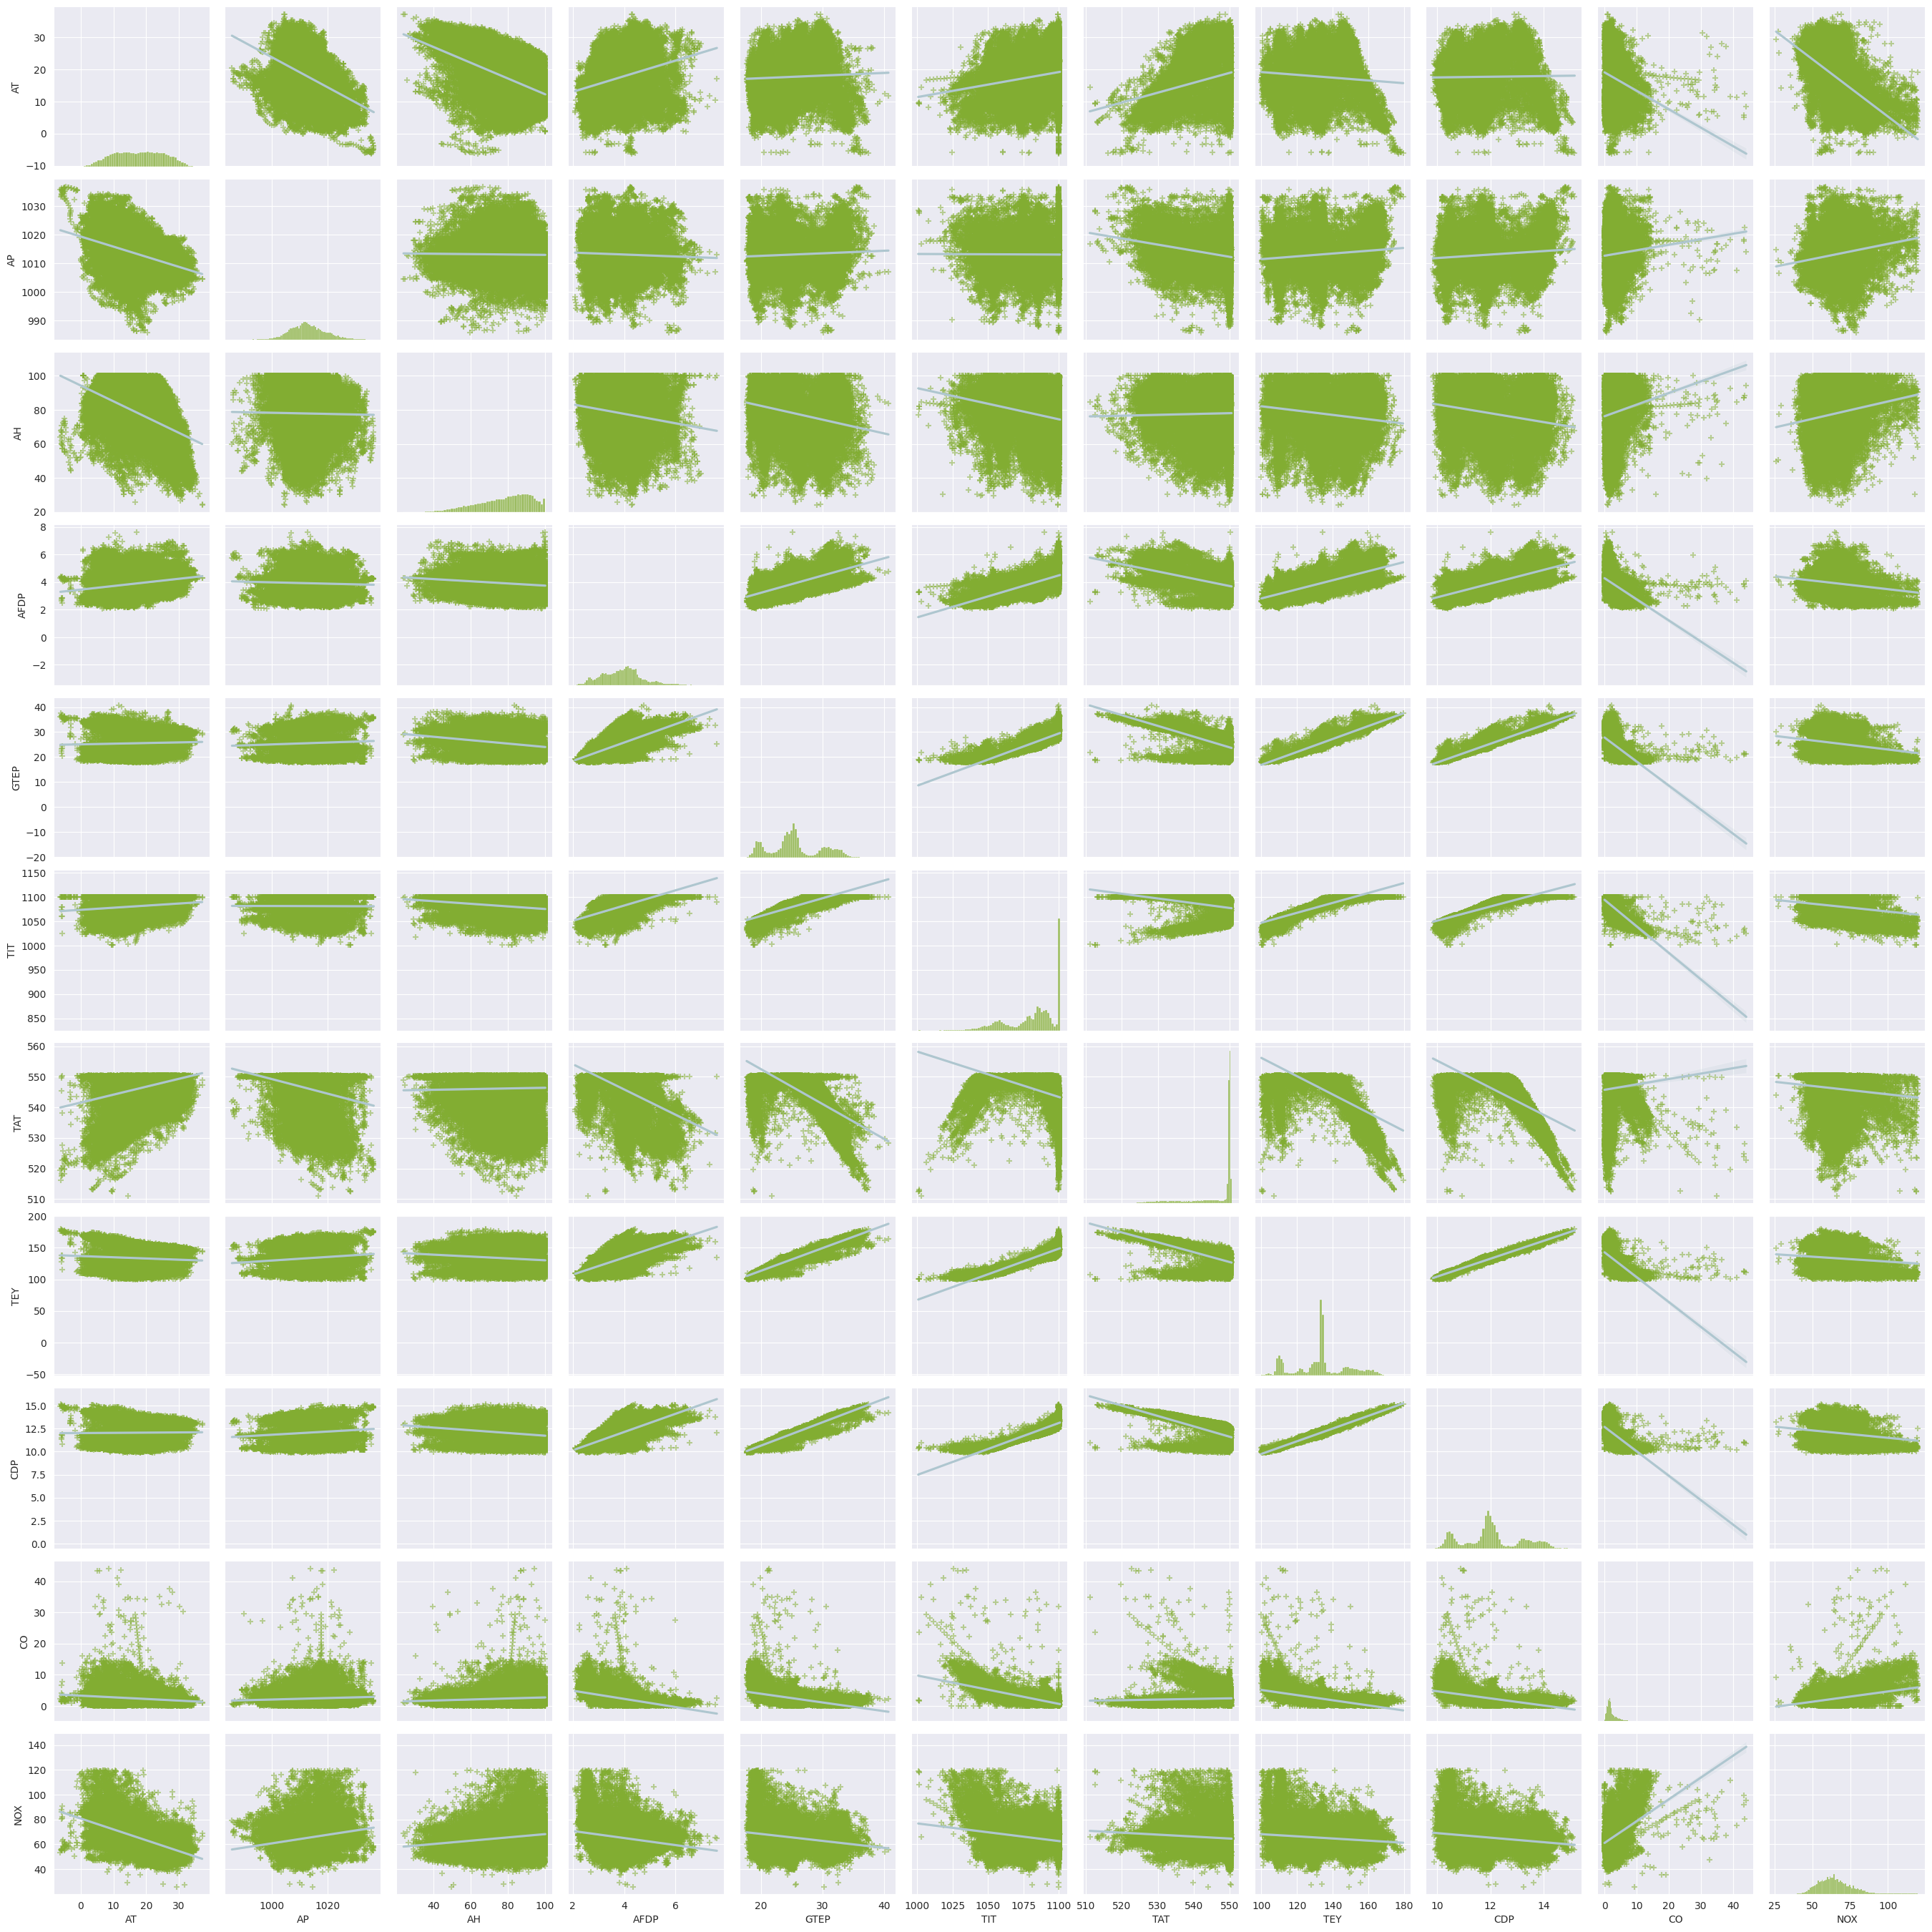

In [ ]:
sns.pairplot(df, markers="+", kind='reg', diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5, 'color': '#82ad32'}},
             diag_kws= {'color': '#82ad32'})

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

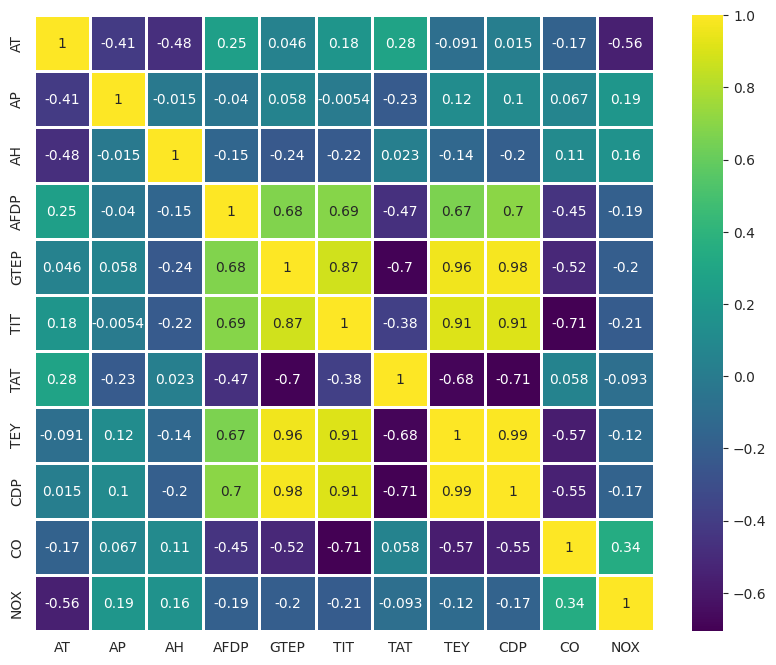

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True, linewidth = 1, linecolor='white')

## 5. Feature Selection Technique<a class="anchor" id="5"></a>

In [ ]:
x = df.drop('TEY', axis=1)
y = df['TEY']

In [ ]:
# Feature extraction
test = SelectKBest(score_func = mutual_info_regression, k='all')
fit = test.fit(x,y)

In [ ]:
# Summerize score
scores = fit.scores_
features = fit.transform(x)

In [ ]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),columns = ['Score', 'Feature'])
score_df.sort_values(by = 'Score', ascending=False, inplace=True)
score_df

,Score,Feature
7,1.833949,CDP
4,1.492813,GTEP
5,1.354079,TIT
6,0.776873,TAT
3,0.507051,AFDP
8,0.495137,CO
0,0.322902,AT
9,0.274620,NOX
1,0.125878,AP
2,0.078535,AH


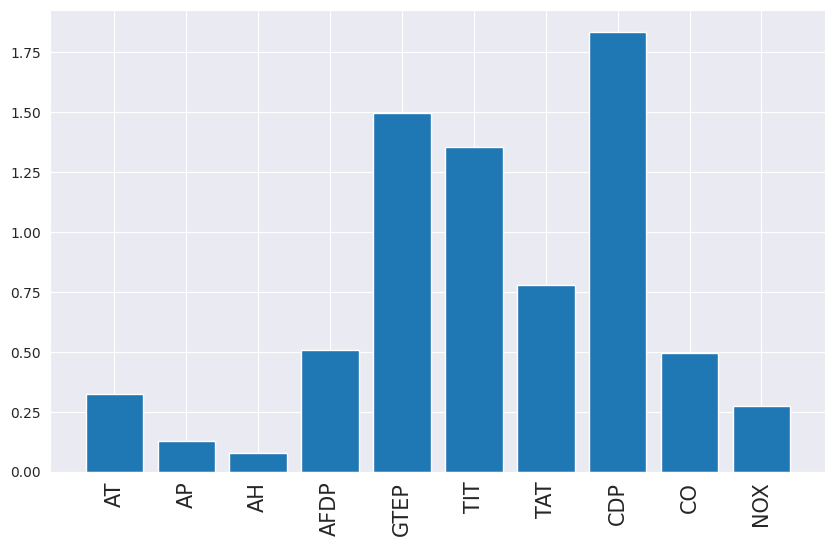

In [ ]:
fig, axes = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

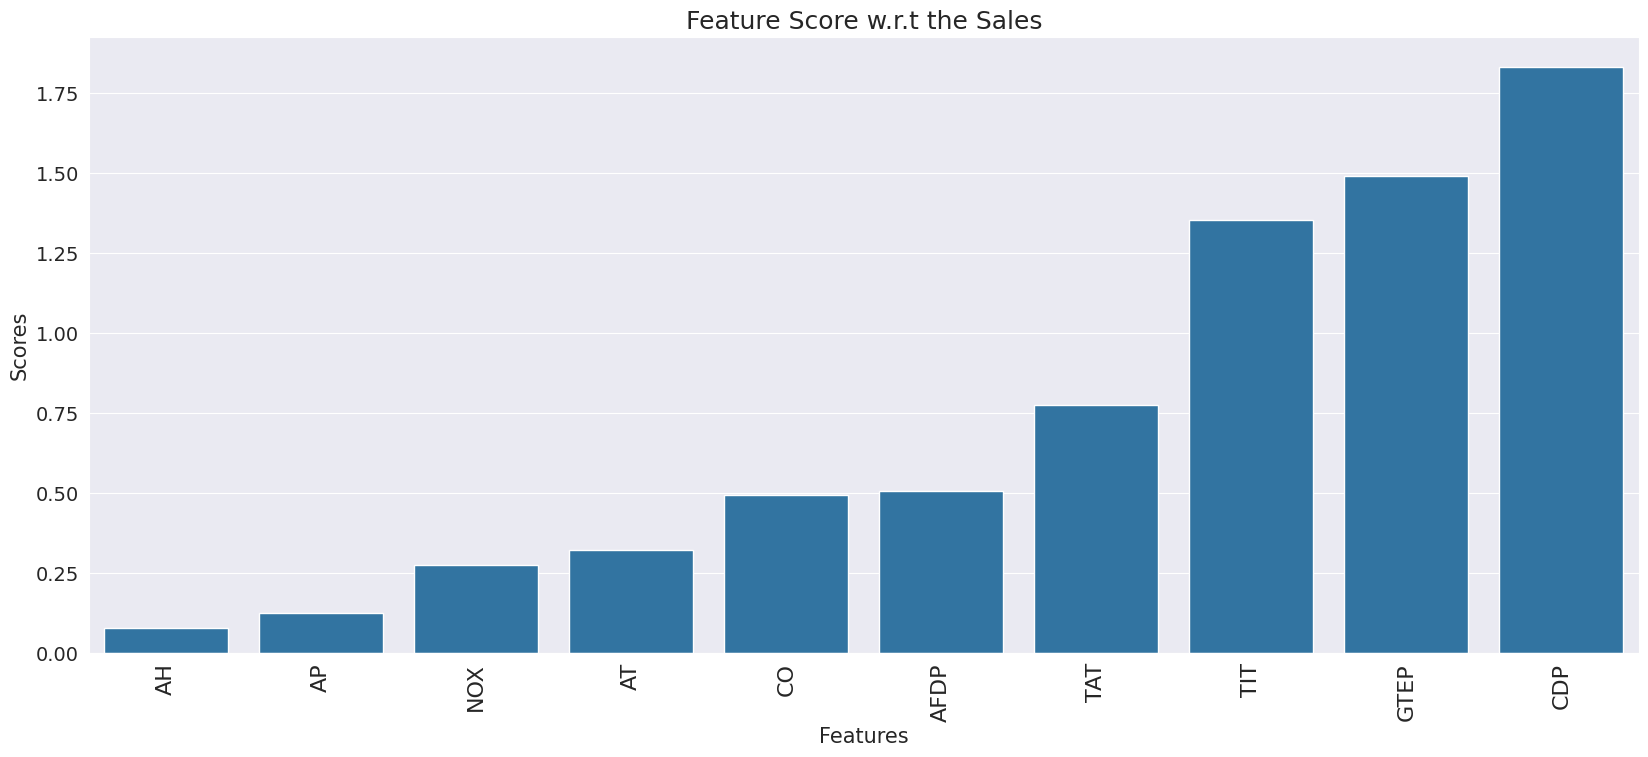

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [ ]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.833949,CDP
4,1.492813,GTEP
5,1.354079,TIT
6,0.776873,TAT
3,0.507051,AFDP
8,0.495137,CO
0,0.322902,AT
9,0.274620,NOX
1,0.125878,AP
2,0.078535,AH


In [ ]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,11.898,23.979,1086.2,549.83,3.5758,0.32663,4.5878,134.67
1,11.892,23.951,1086.1,550.05,3.5709,0.44784,4.2932,134.67
2,12.042,23.990,1086.5,550.19,3.5828,0.45144,3.9045,135.10
3,11.990,23.911,1086.5,550.17,3.5808,0.23107,3.7436,135.03
4,11.910,23.917,1085.9,550.00,3.5781,0.26747,3.7516,134.67


### 5.1. Data Pre-Processing<a class="anchor" id="5.1"></a>
#### Deal with missing data
There is no missing value in this dataset. Neither, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

#### Applying Standard Scaler
+ For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
+ x_scaled = x – mean/std_dev
+ However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [ ]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [ ]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-0.149273,-0.377702,0.272119,0.536589,-0.451875,-0.904182,-1.762362,0.074502
1,-0.154783,-0.384376,0.266417,0.568742,-0.458207,-0.850611,-1.801920,0.074502
2,-0.017015,-0.375081,0.289227,0.589203,-0.442831,-0.849020,-1.854113,0.102033
3,-0.064774,-0.393909,0.289227,0.586280,-0.445415,-0.946415,-1.875718,0.097551
4,-0.138251,-0.392479,0.255012,0.561434,-0.448904,-0.930328,-1.874644,0.074502


#### Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [ ]:
print('Mean' '\n', np.round(df_standard_scaled.mean(),1), '\n' 'Standard Deviation', '\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP    -0.0
GTEP    0.0
TIT     0.0
TAT    -0.0
AFDP   -0.0
CO     -0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Deviation 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


### 5.2 Test Train Split With Imbalanced Dataset<a class="anchor" id="5.2"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)


In [ ]:
x = df_standard_scaled.drop('TEY', axis=1)
y = df_standard_scaled['TEY']

In [ ]:
# Splitting data into train and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=3)

## 6. Hyperparameter Tuning<a class="anchor" id="6"></a>

### 6.1 **`Hyperparameter Tuning`**: Optimal Learning rate ,Number of Layers and Neurons<a class="anchor" id="6.1"></a>

In [ ]:
def build_model(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers', 2,20)):
    model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=32),activation = 'relu'))
    model.add(layers.Dense(1,activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                  loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

Reloading Tuner from project/Gas Turbine/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_data = (x_test, y_test))

In [ ]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 2 summary
Hyperparameters:
num_layers: 8
units_0: 64
learning_rate: 0.001
Score: 0.030804945155978203

Trial 4 summary
Hyperparameters:
num_layers: 15
units_0: 96
learning_rate: 0.0001
Score: 0.03307347744703293

Trial 0 summary
Hyperparameters:
num_layers: 7
units_0: 96
learning_rate: 0.01
Score: 0.033570567766825356

Trial 1 summary
Hyperparameters:
num_layers: 16
units_0: 64
learning_rate: 0.01
Score: 0.033671302100022636

Trial 3 summary
Hyperparameters:
num_layers: 14
units_0: 32
learning_rate: 0.01
Score: 0.034601240108410515


### 6.2 **`Hyperparameter Tuning`**: Optimal Batch_size, Number of Epochs<a class="anchor" id="6.2"></a>

In [ ]:
def create_model():
  model1 = Sequential()
  model1.add(Dense(32, input_dim=7, activation='relu'))
  model1.add(Dense(64, activation='relu'))
  model1.add(Dense(96, activation='relu'))
  model1.add(Dense(32, activation='relu'))
  model1.add(Dense(64, activation='relu'))
  model1.add(Dense(32, activation='relu'))
  model1.add(Dense(96, activation='relu'))
  model1.add(Dense(96, activation='relu'))
  model1.add(Dense(32, activation='relu'))
  model1.add(Dense(64, activation='relu'))
  model1.add(Dense(64, activation='relu'))
  model1.add(Dense(units=1, activation='linear'))

  adam = Adam(learning_rate=0.001)
  model1.compile(loss = 'mean_absolute_error',optimizer=adam, metrics = ['mean_absolute_error'])
  return model1


In [ ]:
model1 = KerasRegressor(build_fn = create_model, verbose=0)
batch_size = [10, 20, 40, 50]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size = batch_size, epochs=epochs)
grid = GridSearchCV(estimator = model1, param_grid = param_grid, cv = KFold(), verbose=10)

In [ ]:
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.997 total time=  44.2s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.997 total time=  43.7s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.997 total time=  23.3s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.997 total time=  23.7s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.997 total time=  43.9s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/16] END ....batch_size=10, epochs=50;, score=0.997 total time= 1.8min
[CV 2/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/16] END ....batch_size=10, epochs=50;, score=0.998 total time= 1.8min
[CV 3/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/16] END ....batch_size=10, epochs=50;, score=0.996 total time= 2.4min
[CV 4/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/16] END ....batch_size=10, epochs=50;, score=0.998 total time= 2.4min
[CV 5/5; 2/16] START batch_size=10, epochs=50...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/16] END ....batch_size=10, epochs=50;, score=0.997 total time= 2.4min
[CV 1/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/16] END ...batch_size=10, epochs=100;, score=0.998 total time= 3.6min
[CV 2/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/16] END ...batch_size=10, epochs=100;, score=0.998 total time= 3.7min
[CV 3/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/16] END ...batch_size=10, epochs=100;, score=0.997 total time= 4.4min
[CV 4/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/16] END ...batch_size=10, epochs=100;, score=0.998 total time= 3.6min
[CV 5/5; 3/16] START batch_size=10, epochs=100..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/16] END ...batch_size=10, epochs=100;, score=0.998 total time= 3.6min
[CV 1/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/16] END ...batch_size=10, epochs=200;, score=0.998 total time= 7.1min
[CV 2/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/16] END ...batch_size=10, epochs=200;, score=0.998 total time= 7.1min
[CV 3/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/16] END ...batch_size=10, epochs=200;, score=0.998 total time= 7.1min
[CV 4/5; 4/16] START batch_size=10, epochs=200..................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

### 6.3 **`Hyperparameter Tuning`**: Optimal Droupout rate<a class="anchor" id="6.3"></a>

In [ ]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [ ]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result2 = grid2.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

### 6.4 **`Hyperparameter Tuning`**: Optimal Activation Function and Kernel Initializer<a class="anchor" id="6.4"></a>

In [ ]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))

    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [ ]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result3 = grid3.fit(x_test,y_test)

In [ ]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

### 7. Model Building Neural Networks<a class="anchor" id="7"></a>

#### Standardizing only predictor variable - after train test split

In [ ]:
model_data

In [ ]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

In [ ]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

In [ ]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

In [ ]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParamTable = finalParamTable.reset_index()
#print(finalParamTable_1)
#print(finalParamTable['Accuracy'].idxmax())
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

#### Training Model - using best params

In [ ]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

### 7.1 Model Evaluation Train and Test Error<a class="anchor" id="7.1"></a>

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

### 7.2 Predicting values from Model using same dataset<a class="anchor" id="7.2"></a>

In [ ]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

In [ ]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

### 7.3 Calculating Absolute Percent Error and Error<a class="anchor" id="7.3"></a>

In [ ]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

In [ ]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

### 7.4 Visualizing the Relationship between the Actual and Predicted ValuesModel Validation<a class="anchor" id="7.4"></a>

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [ ]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

In [ ]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

### 7.5 Residual Analysis<a class="anchor" id="7.5"></a>
+ Test for Normality of Residuals (Q-Q Plot)

In [ ]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

In [ ]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

#### ^Observation: Error should have Normal / Gaussian distribution~N(0,1) and independently and identically distributed.